In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [46]:
df = pd.read_csv("Data\Q1\communities.csv", na_values="?")


In [3]:
df.head()

,state,county,community,communityname string,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [18]:
df.columns

Index([' state ', ' county ', ' community ', ' communityname string', ' fold ',
       ' population ', ' householdsize ', ' racepctblack ', ' racePctWhite ',
       ' racePctAsian ',
       ...
       ' LandArea ', ' PopDens ', ' PctUsePubTrans ', ' PolicCars ',
       ' PolicOperBudg ', ' LemasPctPolicOnPatr ', ' LemasGangUnitDeploy ',
       ' LemasPctOfficDrugUn ', ' PolicBudgPerPop ', ' ViolentCrimesPerPop '],
      dtype='object', length=128)

In [50]:
df1 = df.drop([' state ', ' county ', ' community ',
               ' communityname string', ' fold '], axis="columns")
df1.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [51]:
df1.shape

(1994, 123)

In [56]:
np.sum(df1.isna())


 population                 0
 householdsize              0
 racepctblack               0
 racePctWhite               0
 racePctAsian               0
                         ... 
 LemasPctPolicOnPatr     1675
 LemasGangUnitDeploy     1675
 LemasPctOfficDrugUn        0
 PolicBudgPerPop         1675
 ViolentCrimesPerPop        0
Length: 123, dtype: int64

In [63]:
threshold = 300
to_remove = []

for column in df1.columns:
    na_count = np.sum(df1[column].isna())
    if na_count > 300:
        to_remove.append(column)


print(len(to_remove))  
print(to_remove)

22
[' LemasSwornFT ', ' LemasSwFTPerPop ', ' LemasSwFTFieldOps ', ' LemasSwFTFieldPerPop ', ' LemasTotalReq ', ' LemasTotReqPerPop ', ' PolicReqPerOffic ', ' PolicPerPop ', ' RacialMatchCommPol ', ' PctPolicWhite ', ' PctPolicBlack ', ' PctPolicHisp ', ' PctPolicAsian ', ' PctPolicMinor ', ' OfficAssgnDrugUnits ', ' NumKindsDrugsSeiz ', ' PolicAveOTWorked ', ' PolicCars ', ' PolicOperBudg ', ' LemasPctPolicOnPatr ', ' LemasGangUnitDeploy ', ' PolicBudgPerPop ']


In [67]:
df2 = df1.drop(to_remove,axis="columns")
df2.shape

(1994, 101)

In [74]:
df3 = df2.dropna(axis=0)
df3.head(3)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43


(array([679., 470., 304., 154.,  97., 107.,  66.,  26.,  33.,  57.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

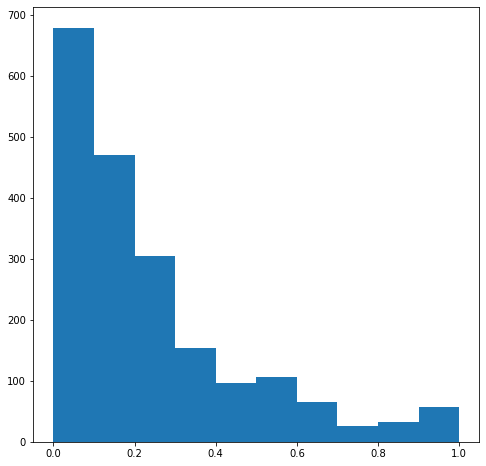

In [84]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1,1,1)
ax.hist(df3[' ViolentCrimesPerPop '])


Text(0, 0.5, 'Population Size')

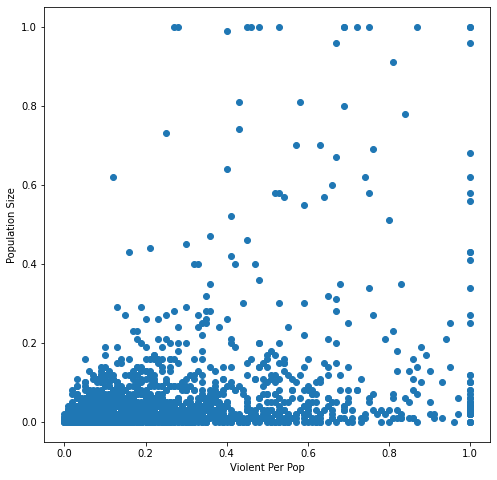

In [86]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df3[' ViolentCrimesPerPop '], df3[' population '])
ax.set_xlabel("Violent Per Pop")
ax.set_ylabel("Population Size")
